Recall (Sensitivity) $ \dfrac{TP}{TP+FN} $ 이 매우 중요다고 판단할 수 있다.


**Precision의 경우**
- False Positive :
    - 무시해도 될 신인인데 굳이 컨텐츠를 생산했다. 
        - 뭐 어때, 에너지 소비하긴 했지만 괜찮.

**Recall의 경우**
- False Negative:
    - 빠르게 컨텐츠를 생산해야 하는 신인인데, 걸러버렸다.
        - 다른 매체에 선수를 뺐길 수 있다. 유저 유입이 적어짐.
        - 다른 부가 한국에서의 공연 에이전시 계약, 머천다이즈 등 부가적인 기회들을 놓쳐버릴 수 있음.
        
     

### 반영 사항

- 평점 제거
    - 결과 : 0.59
    
- Genre Funk 제거
    - 결과 : 0.56
    
- Freq Genius 제거
    - 결과 : 0.57

In [816]:
import pandas as pd
import numpy as np

## Load Data

In [817]:
df = pd.read_csv("../data/df_baseline.csv")

In [818]:
print(df.shape)

(1083, 18)


In [819]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 18 columns):
label             1083 non-null int64
artist            1083 non-null object
album             1083 non-null object
genre             1083 non-null object
single_count      1083 non-null int64
freq_billboard    1083 non-null int64
freq_genius       1083 non-null int64
freq_theSource    1083 non-null int64
freq_xxl          1083 non-null int64
rating_AOTY       61 non-null float64
rating_meta       324 non-null float64
rating_pitch      220 non-null float64
twitter           1083 non-null int64
instagram         1083 non-null int64
facebook          1083 non-null int64
spotify           1083 non-null int64
soundcloud        1083 non-null int64
youtube           1083 non-null int64
dtypes: float64(3), int64(12), object(3)
memory usage: 152.4+ KB


In [820]:
df.describe()

,label,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,rating_AOTY,rating_meta,rating_pitch,twitter,instagram,facebook,spotify,soundcloud,youtube
count,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,61.000000,324.000000,220.000000,1.083000e+03,1.083000e+03,1.083000e+03,1.083000e+03,1.083000e+03,1.083000e+03
mean,0.209603,2.595568,0.642659,1.395199,13.378578,232.204063,66.098361,71.015432,6.810000,8.162517e+05,1.148277e+06,9.392479e+05,4.052015e+05,2.045023e+05,5.766690e+05
std,0.407213,2.806590,3.372542,24.121972,40.525759,924.497039,16.944719,9.724840,1.360932,3.595182e+06,6.297742e+06,3.392730e+06,1.143469e+06,8.875424e+05,1.908113e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,65.000000,6.100000,3.949000e+03,0.000000e+00,1.013800e+04,7.023000e+03,0.000000e+00,0.000000e+00
50%,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000,69.000000,72.500000,7.050000,4.024000e+04,3.099500e+04,7.855900e+04,4.727500e+04,1.736000e+03,1.924800e+04
75%,0.000000,4.000000,0.000000,0.000000,4.000000,65.500000,76.000000,78.000000,7.800000,2.889390e+05,3.010275e+05,4.527645e+05,2.269760e+05,3.220250e+04,2.148705e+05
max,1.000000,37.000000,73.000000,731.000000,200.000000,12802.000000,85.000000,92.000000,9.500000,5.696178e+07,1.366012e+08,6.167920e+07,1.382065e+07,9.710262e+06,2.367711e+07


# Feature Engineering

### Rating

#### 스케일링

In [821]:
df['rating_pitch'] = df['rating_pitch'] * 10

In [822]:
df['rating_pitch'].head()

0     NaN
1     NaN
2     NaN
3    78.0
4     NaN
Name: rating_pitch, dtype: float64

In [823]:
def avg_rating():
    for i in range(len(df)):
        if np.isnan(df.loc[i, 'rating_meta']) == True:
            if np.isnan(df.loc[i, 'rating_pitch']) == True:
                if np.isnan(df.loc[i, 'rating_AOTY']) == True:
                    df.loc[i, 'rating'] = 0
                else:
                    df.loc[i, 'rating'] = df.loc[i, 'rating_AOTY']
            else:
                df.loc[i, 'rating'] = df.loc[i, 'rating_pitch']
        else:
            df.loc[i, 'rating'] = df.loc[i, 'rating_meta']
            
    return df.head()

In [824]:
avg_rating()

,label,artist,album,genre,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,rating_AOTY,rating_meta,rating_pitch,twitter,instagram,facebook,spotify,soundcloud,youtube,rating
0,0,Flash Bang Grenada,10 Haters,hiphop,0,0,0,0,0,NaN,NaN,NaN,0,0,0,346,0,0,0.0
1,0,Aggro Santos,AggroSantos.com,hiphop,3,0,0,0,0,NaN,NaN,NaN,63771,27415,596562,4675,585,7975,0.0
2,0,AKA,Altar Ego,hiphop,4,0,0,1,2,NaN,NaN,NaN,38958,0,0,22298,0,3643764,0.0
3,0,Shlohmo,Bad Vibes,hiphop,0,0,0,0,67,NaN,NaN,78.0,91790,59340,209063,141268,283539,0,78.0
4,0,Glasses Malone,Beach Cruiser,hiphop,4,0,0,0,4,NaN,NaN,NaN,68417,48745,93741,16402,0,0,0.0


## Data Preparation for Modeling

#### 장르 `hiphop`, `R&B`, `Soul`, `Funk`, `Pop`

In [825]:
df = pd.get_dummies(df, columns=['genre'])

In [826]:
df.columns

Index(['label', 'artist', 'album', 'single_count', 'freq_billboard',
       'freq_genius', 'freq_theSource', 'freq_xxl', 'rating_AOTY',
       'rating_meta', 'rating_pitch', 'twitter', 'instagram', 'facebook',
       'spotify', 'soundcloud', 'youtube', 'rating', 'genre_Soul',
       'genre_funk', 'genre_hiphop', 'genre_pop', 'genre_rnb', 'genre_soul'],
      dtype='object')

In [827]:
df.head()

,label,artist,album,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,rating_AOTY,rating_meta,...,spotify,soundcloud,youtube,rating,genre_Soul,genre_funk,genre_hiphop,genre_pop,genre_rnb,genre_soul
0,0,Flash Bang Grenada,10 Haters,0,0,0,0,0,NaN,NaN,...,346,0,0,0.0,0,0,1,0,0,0
1,0,Aggro Santos,AggroSantos.com,3,0,0,0,0,NaN,NaN,...,4675,585,7975,0.0,0,0,1,0,0,0
2,0,AKA,Altar Ego,4,0,0,1,2,NaN,NaN,...,22298,0,3643764,0.0,0,0,1,0,0,0
3,0,Shlohmo,Bad Vibes,0,0,0,0,67,NaN,NaN,...,141268,283539,0,78.0,0,0,1,0,0,0
4,0,Glasses Malone,Beach Cruiser,4,0,0,0,4,NaN,NaN,...,16402,0,0,0.0,0,0,1,0,0,0


#### Split train & test data 

In [828]:
feature_names = ['artist', 'album', 'single_count', 
                 'freq_billboard', 'freq_genius', 'freq_theSource', 'freq_xxl',
                 'twitter', 'instagram', 'facebook',
                 'spotify', 'soundcloud', 'youtube',
                 'genre_funk', 'genre_hiphop', 'genre_pop', 'genre_rnb', 'genre_soul',
                 'rating'
                ]
dfX = df[feature_names].copy()
dfy = df['label'].copy()

In [829]:
dfX.tail()

,artist,album,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,twitter,instagram,facebook,spotify,soundcloud,youtube,genre_funk,genre_hiphop,genre_pop,genre_rnb,genre_soul,rating
1078,Lo Moon,Lo Moon,0,0,0,200,9,3708,7855,10703,15130,1043,14066,0,0,1,0,0,73.0
1079,Calum Scott,Only Human,3,2,0,0,9,600,286554,355355,329507,21954,1728617,0,0,1,0,0,76.0
1080,Angie,Suicidal Since 1995,2,0,0,0,0,1913,23837,9187,16544,756,743,0,0,1,0,0,76.0
1081,Superorganism,Superorganism,6,2,0,0,0,11571,27192,27615,60983,6295,43228,0,0,1,0,0,73.0
1082,The Academic,Tales from the Backseat,4,1,0,0,213,19974,27428,60138,37009,2341,22642,0,0,1,0,0,67.0


In [830]:
dfy.tail()

1078    0
1079    0
1080    0
1081    0
1082    0
Name: label, dtype: int64

In [831]:
from sklearn.model_selection import train_test_split
X_train_0, X_test_0, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [832]:
X_train = X_train_0.drop(columns=['artist', 'album'])
X_test = X_test_0.drop(columns=['artist', 'album'])

# Random Forest

In [833]:
from sklearn.ensemble import RandomForestClassifier

In [834]:
model = RandomForestClassifier(criterion='entropy', n_estimators=10, max_depth=10,
                                min_samples_split=5, min_samples_leaf=5
                                ).fit(X_train, y_train)

In [835]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, model.predict(X_train))

array([[638,   8],
       [ 37, 129]])

In [836]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       646
          1       0.94      0.78      0.85       166

avg / total       0.94      0.94      0.94       812



In [837]:
confusion_matrix(y_test, model.predict(X_test))

array([[200,  10],
       [ 27,  34]])

In [838]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.88      0.95      0.92       210
          1       0.77      0.56      0.65        61

avg / total       0.86      0.86      0.86       271



In [839]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

In [840]:
import matplotlib.pyplot as plt

def draw_roc():
   
    plt.figure(figsize=(10, 10))

    plt.plot(fpr, tpr, label="roc curve")
    plt.legend()
    plt.plot([0, 1], [0, 1], 'k--', label="random guess")
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver operating characteristic example')
    plt.show()

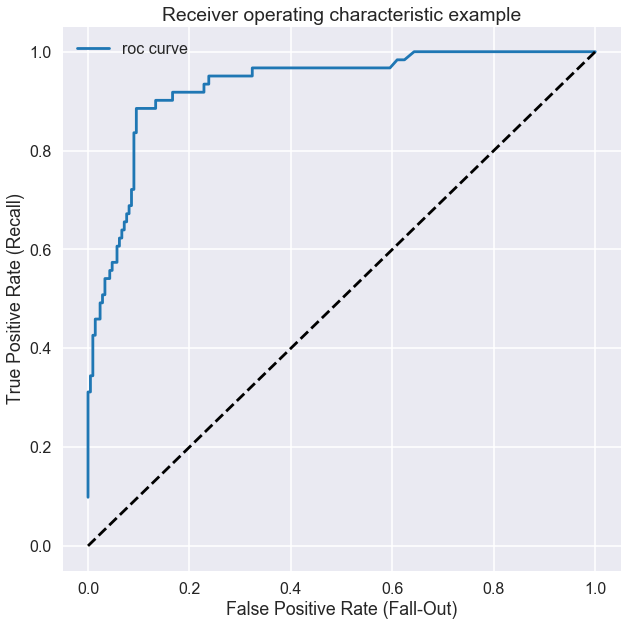

In [841]:
draw_roc()

In [842]:
from sklearn.metrics import auc

auc(fpr, tpr)

0.9310304449648712

In [843]:
for name, importance in zip(X_train.columns, model.feature_importances_):
    print(name, importance)

single_count 0.025743267235128636
freq_billboard 0.005577163003477516
freq_genius 0.010198323759880659
freq_theSource 0.08178575601380805
freq_xxl 0.058047823061196324
twitter 0.05452048476085364
instagram 0.06225130201924732
facebook 0.06533861688505532
spotify 0.17094964749046107
soundcloud 0.23320166940816128
youtube 0.038868231268910466
genre_funk 0.0
genre_hiphop 0.05339710857666358
genre_pop 0.10096225513679949
genre_rnb 0.00317167298301778
genre_soul 0.0
rating 0.035986678397338934


In [861]:
scores_dict = {num_trees:[] for num_trees in np.logspace(start=1,stop=3.478,num=20).astype(int)}
oob_err_dict = {num_trees:0 for num_trees in np.logspace(start=1,stop=3.478,num=20).astype(int)}
k = 10
for num_trees in np.logspace(start=1,stop=3.478,num=20).astype(int):
    warnings.filterwarnings("ignore")
    clf = RandomForestClassifier(n_estimators=num_trees, n_jobs=-1, max_depth=10, oob_score=True)
    scores = cross_val_score(clf, X_train, y_train, cv=k, n_jobs=-1)
    model = clf.fit(X_train, y_train)
    preds = model.predict(X_test)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    scores_dict[num_trees].append([scores.mean(), precision, recall, f1])
    temp_oob = 1 - clf.oob_score_
    oob_err_dict[num_trees] = temp_oob

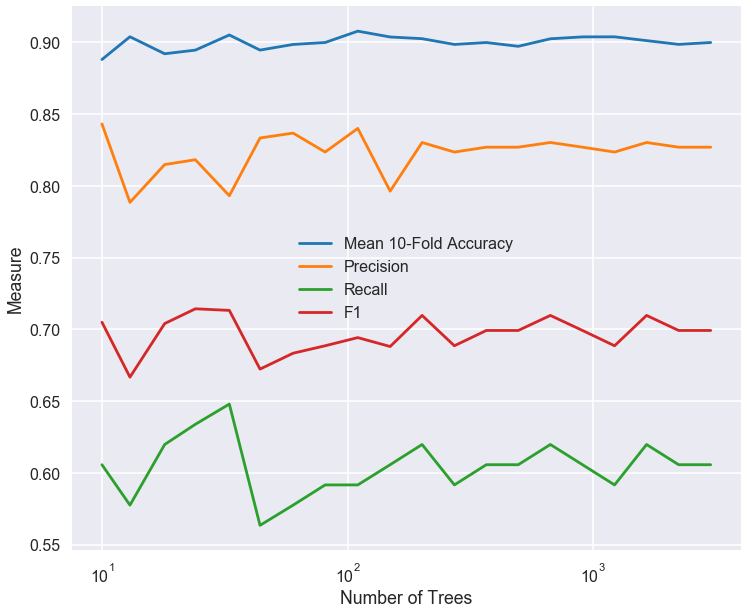

In [862]:
fig, ax = plt.subplots(figsize=(12,10))
ax.semilogx(list(scores_dict.keys()),[elem[0][0] for elem in scores_dict.values()], '-', label='Mean 10-Fold Accuracy')
ax.semilogx(list(scores_dict.keys()),[elem[0][1] for elem in scores_dict.values()], '-', label='Precision')
ax.semilogx(list(scores_dict.keys()),[elem[0][2] for elem in scores_dict.values()], '-', label='Recall')
ax.semilogx(list(scores_dict.keys()),[elem[0][3] for elem in scores_dict.values()], '-', label='F1')
ax.legend()
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Measure')
# ax.set_ylim(0.89,1.)
plt.show()

In [ ]:
pred = model.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(pred, columns=['pred'])

In [ ]:
df_pred

In [ ]:
y_label = y_test.copy().reset_index(drop=True)
X_test_2 = X_test_0.copy().reset_index(drop=True)

In [ ]:
X_test_2['label'] = y_label

In [ ]:
X_test_2['pred'] = df_pred['pred']

In [ ]:
X_test_2

In [ ]:
tmp = X_test_2[X_test_2['label'] != X_test_2['pred']]

In [ ]:
tmp

In [ ]:
tmp.to_csv("incorrect_prediction.csv")

In [ ]:
tmp[tmp['label'] == 1]

In [864]:
from imblearn.under_sampling import *

In [865]:
rus = RandomUnderSampler(random_state=0)

In [866]:
X_resampled_rus, y_resampled_rus = rus.fit_sample(X_train, y_train)

In [867]:
from collections import Counter
print(sorted(Counter(y_resampled_rus).items()))

[(0, 156), (1, 156)]


In [868]:
model6 = RandomForestClassifier(criterion='entropy', n_estimators=10, max_depth=10,
                                min_samples_split=2 , min_samples_leaf=1
                                ).fit(X_resampled_rus, y_resampled_rus)

In [869]:
confusion_matrix(y_train, model6.predict(X_train))

array([[537,  65],
       [  3, 153]])

In [870]:
print(classification_report(y_train, model6.predict(X_train)))

             precision    recall  f1-score   support

          0       0.99      0.89      0.94       602
          1       0.70      0.98      0.82       156

avg / total       0.93      0.91      0.92       758



In [871]:
confusion_matrix(y_test, model6.predict(X_test))

array([[224,  30],
       [ 12,  59]])

In [872]:
print(classification_report(y_test, model6.predict(X_test)))

             precision    recall  f1-score   support

          0       0.95      0.88      0.91       254
          1       0.66      0.83      0.74        71

avg / total       0.89      0.87      0.88       325



In [873]:
fpr, tpr, thresholds = roc_curve(y_test, model6.predict_proba(X_test)[:, 1])

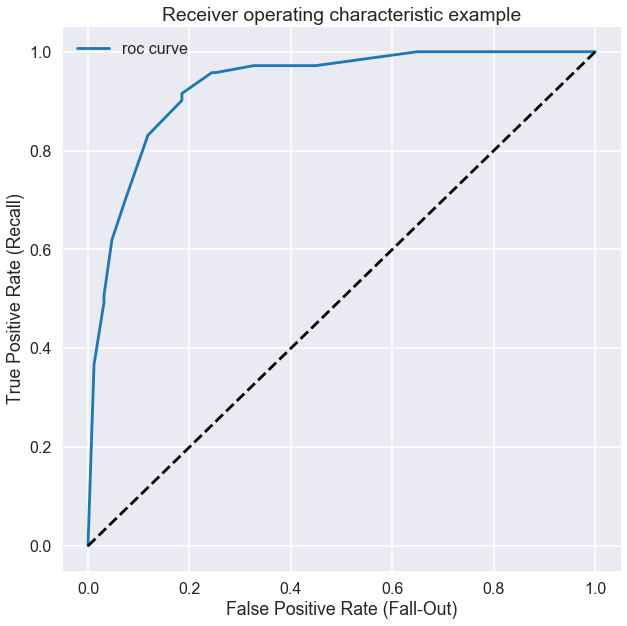

In [874]:
draw_roc()

In [875]:
auc(fpr, tpr)

0.9309360097593435

In [876]:
for name, importance in zip(X_train.columns, model6.feature_importances_):
    print(name, importance)

single_count 0.027664192037027052
freq_billboard 0.006676554111546136
freq_genius 0.0028968477914718413
freq_theSource 0.09012617608323678
freq_xxl 0.1068590860566905
twitter 0.09942425527608234
instagram 0.04888727568048229
facebook 0.061218944587207516
spotify 0.15484396899195094
soundcloud 0.19298405734576585
youtube 0.07491235999995616
genre_funk 0.0
genre_hiphop 0.023689059954282103
genre_pop 0.04869658817804129
genre_rnb 0.008004808939347833
genre_soul 0.004949098873107861
rating 0.048166726093803514


In [877]:
scores_dict = {num_trees:[] for num_trees in np.logspace(start=1,stop=3.478,num=20).astype(int)}
oob_err_dict = {num_trees:0 for num_trees in np.logspace(start=1,stop=3.478,num=20).astype(int)}
k = 10
for num_trees in np.logspace(start=1,stop=3.478,num=20).astype(int):
    warnings.filterwarnings("ignore")
    clf = RandomForestClassifier(n_estimators=num_trees, n_jobs=-1, max_depth=10, oob_score=True)
    scores = cross_val_score(clf, X_resampled_rus, y_resampled_rus, cv=k, n_jobs=-1)
    model = clf.fit(X_resampled_rus, y_resampled_rus)
    preds = model.predict(X_test)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    scores_dict[num_trees].append([scores.mean(), precision, recall, f1])
    temp_oob = 1 - clf.oob_score_
    oob_err_dict[num_trees] = temp_oob

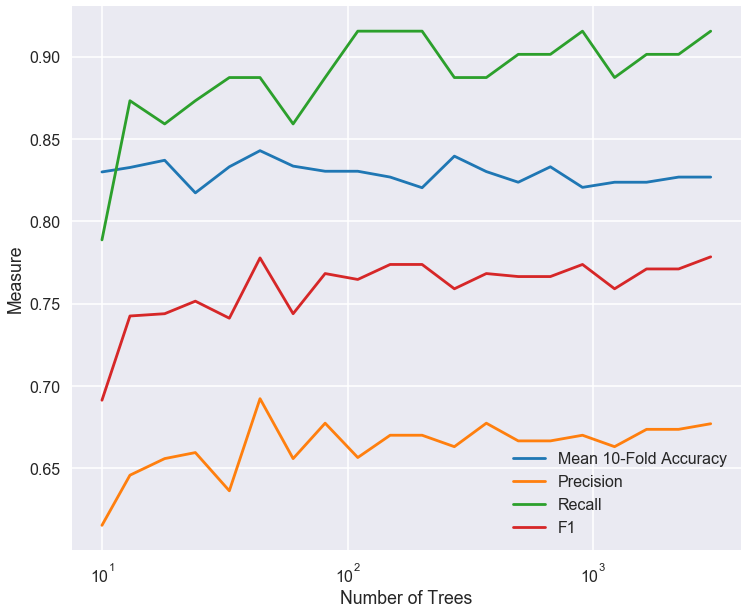

In [878]:
fig, ax = plt.subplots(figsize=(12,10))
ax.semilogx(list(scores_dict.keys()),[elem[0][0] for elem in scores_dict.values()], '-', label='Mean 10-Fold Accuracy')
ax.semilogx(list(scores_dict.keys()),[elem[0][1] for elem in scores_dict.values()], '-', label='Precision')
ax.semilogx(list(scores_dict.keys()),[elem[0][2] for elem in scores_dict.values()], '-', label='Recall')
ax.semilogx(list(scores_dict.keys()),[elem[0][3] for elem in scores_dict.values()], '-', label='F1')
ax.legend()
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Measure')
# ax.set_ylim(0.89,1.)
plt.show()

In [857]:
import pandas as pd
import numpy as np
import operator
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import SMOTE
import itertools
from collections import Counter
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,\
roc_auc_score,roc_curve,recall_score,precision_score,classification_report,f1_score
from sklearn.model_selection import cross_val_score
import warnings
import time

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('poster')

In [858]:
feature_names = ['artist', 'album', 'single_count', 
                 'freq_billboard', 'freq_genius', 'freq_theSource', 'freq_xxl',
                 'twitter', 'instagram', 'facebook',
                 'spotify', 'soundcloud', 'youtube',
                 'genre_funk', 'genre_hiphop', 'genre_pop', 'genre_rnb', 'genre_soul',
                 'rating'
                ]
dfX = df[feature_names].copy()
dfy = df['label'].copy()

In [859]:
# split into training and testing sets
X_train_0, X_test_0, y_train, y_test = train_test_split(dfX, dfy, test_size=0.3, random_state=0)

In [860]:
X_train = X_train_0.drop(columns=['artist', 'album'])
X_test = X_test_0.drop(columns=['artist', 'album'])

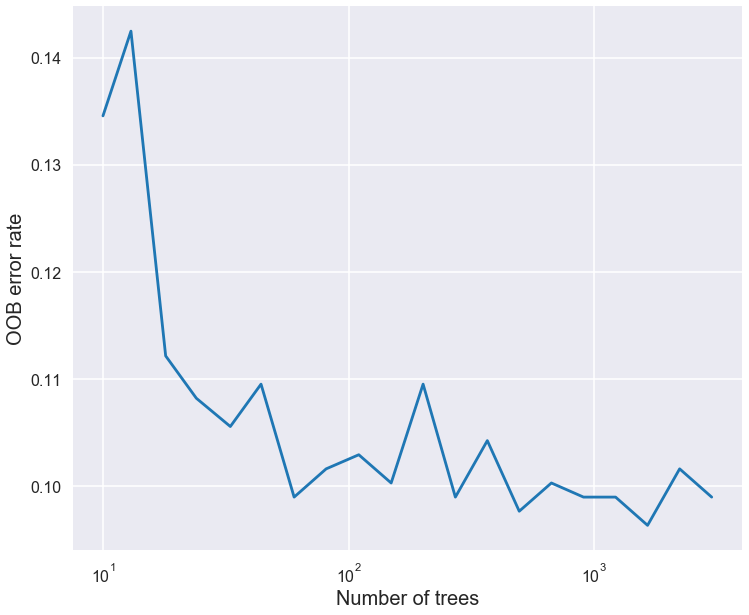

In [863]:
fig, ax = plt.subplots(figsize=(12,10))
ax.semilogx(list(oob_err_dict.keys()), list(oob_err_dict.values()))
ax.set_xlabel('Number of trees', fontsize=20)
ax.set_ylabel('OOB error rate', fontsize=20)
plt.show()

In [603]:
N_trees = 400
clf = RandomForestClassifier(n_estimators=N_trees, n_jobs=-1, max_depth=10, criterion='entropy')
model = clf.fit(X_train, y_train)
preds = model.predict(X_test)

In [604]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix',cmap=plt.cm.Blues, norm=False):
    """
    This function prints and plots the confusion matrix
    """
    fig, ax = plt.subplots(figsize=(12,8))
    
    if norm == True:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.round_(cm, decimals=3)
    
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.grid(False)
    plt.show()

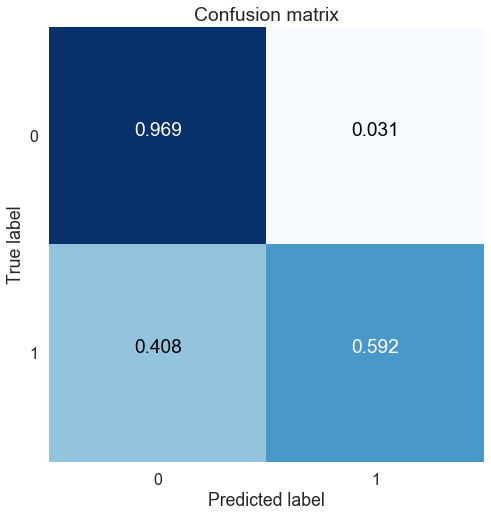

In [605]:
cnf_matrix = confusion_matrix(y_test,model.predict(X_test))
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix', norm=True)

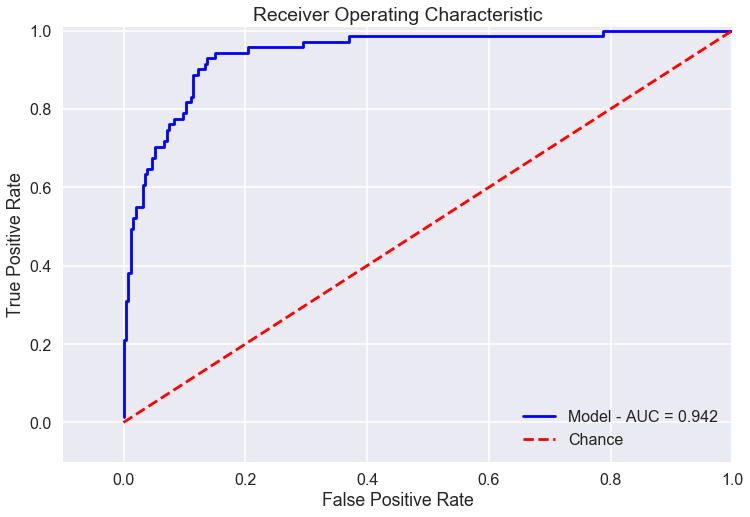

In [606]:
y_prob = clf.predict_proba(X_test)

pos_probs = [y_prob[i][1] for i in range(len(y_prob))]
    
fpr, tpr, threshold = roc_curve(y_test, pos_probs)
auc = roc_auc_score(y_test, pos_probs)

# Plot ROC
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='Model - AUC = %0.3f'% auc)
ax.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--', label='Chance')
ax.legend()
ax.set_xlim([-0.1,1.0])
ax.set_ylim([-0.1,1.01])
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
plt.show()


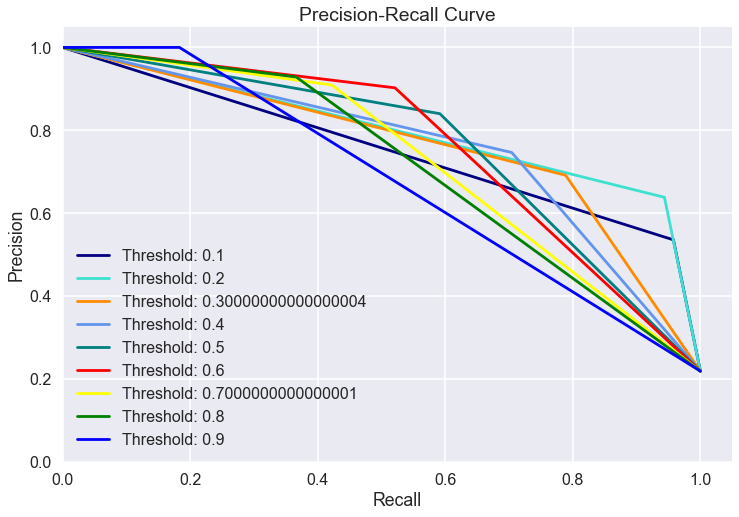

In [607]:
y_prob = model.predict_proba(X_test)

thresholds = np.linspace(start=0.1,stop=0.9,num=9)
colors = ['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black']

plt.figure(figsize=(12,8))

for i,color in zip(thresholds,colors):
    # boolean values if the probability of a fraud classification is above the threshold
    y_bool = y_prob[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_bool)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.05])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
plt.show()

In [615]:
n_fraud_records = len(df[df['label'] == 1])
fraud_indices = np.array(df[df['label'] == 1].index)
normal_indices = df[df.label == 0].index
# amount to oversample by
factor = 20
random_normal_indices = np.array(np.random.choice(normal_indices, int(20*n_fraud_records), replace=True))
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
under_sample_data = df.loc[under_sample_indices,:]
under_sample_data.reset_index(drop=True,inplace=True)

X = under_sample_data.loc[:, under_sample_data.columns != 'label']
y = under_sample_data.loc[:, under_sample_data.columns == 'label']

X = X.as_matrix()
y = y.as_matrix()
y = y.T[0]

print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data['label']==0])/len(under_sample_data))
print("Percentage of fraud transactions: ",len(under_sample_data[under_sample_data['label']==1])/len(under_sample_data))
print("Total number of transactions in under sampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.9523809523809523
Percentage of fraud transactions:  0.047619047619047616
Total number of transactions in under sampled data:  4767


### Undersampling

In [787]:
from imblearn.under_sampling import *

In [802]:
us = RandomUnderSampler(random_state=0)

In [803]:
X_resampled_rus, y_resampled_rus = us.fit_sample(X_train, y_train)

In [804]:
from collections import Counter
print(sorted(Counter(y_resampled_rus).items()))

[(0, 156), (1, 156)]


In [805]:
model6 = RandomForestClassifier(criterion='entropy', n_estimators=10, max_depth=10,
                                min_samples_split=2 , min_samples_leaf=1
                                ).fit(X_resampled_rus, y_resampled_rus)

In [806]:
confusion_matrix(y_train, model6.predict(X_train))

array([[551,  51],
       [  5, 151]])

In [807]:
print(classification_report(y_train, model6.predict(X_train)))

             precision    recall  f1-score   support

          0       0.99      0.92      0.95       602
          1       0.75      0.97      0.84       156

avg / total       0.94      0.93      0.93       758



In [808]:
confusion_matrix(y_test, model6.predict(X_test))

array([[228,  26],
       [ 13,  58]])

In [809]:
print(classification_report(y_test, model6.predict(X_test)))

             precision    recall  f1-score   support

          0       0.95      0.90      0.92       254
          1       0.69      0.82      0.75        71

avg / total       0.89      0.88      0.88       325



In [815]:
scores_dict = {num_trees:[] for num_trees in np.logspace(start=1,stop=3.478,num=20).astype(int)}
oob_err_dict = {num_trees:0 for num_trees in np.logspace(start=1,stop=3.478,num=20).astype(int)}
k = 10
for num_trees in np.logspace(start=1,stop=3.478,num=20).astype(int):
    warnings.filterwarnings("ignore")
    clf = RandomForestClassifier(criterion='entropy', n_estimators=num_trees, max_depth=10,
                                min_samples_split=2 , min_samples_leaf=1, n_jobs=-1, oob_score=True)
    scores = cross_val_score(clf, X_resampled_rus, y_resampled_rus, cv=k, n_jobs=-1)
    model = clf.fit(X_resampled_rus, y_resampled_rus)
    preds = model.predict(X_test)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    scores_dict[num_trees].append([scores.mean(), precision, recall, f1])
    temp_oob = 1 - clf.oob_score_
    oob_err_dict[num_trees] = temp_oob

KeyboardInterrupt: 

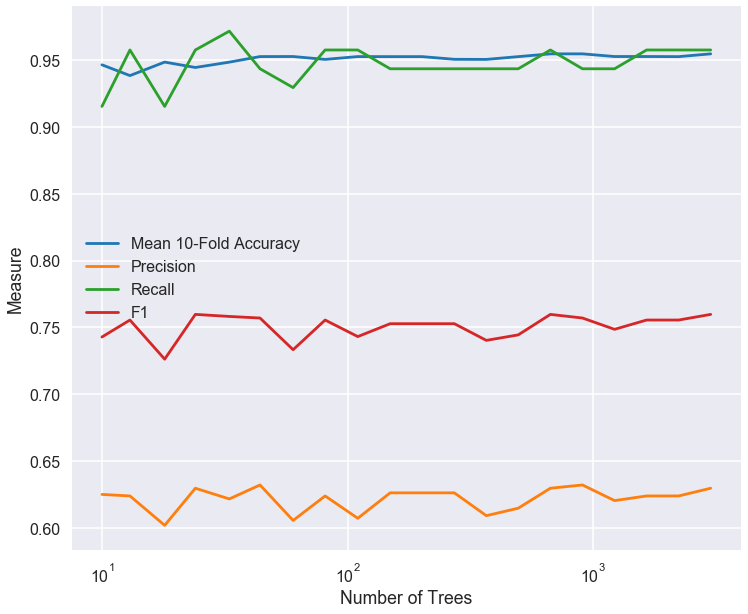

In [800]:
fig, ax = plt.subplots(figsize=(12,10))
ax.semilogx(list(scores_dict.keys()),[elem[0][0] for elem in scores_dict.values()], '-', label='Mean 10-Fold Accuracy')
ax.semilogx(list(scores_dict.keys()),[elem[0][1] for elem in scores_dict.values()], '-', label='Precision')
ax.semilogx(list(scores_dict.keys()),[elem[0][2] for elem in scores_dict.values()], '-', label='Recall')
ax.semilogx(list(scores_dict.keys()),[elem[0][3] for elem in scores_dict.values()], '-', label='F1')
ax.legend()
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Measure')
# ax.set_ylim(0.89,1.)
plt.show()

In [810]:
fpr, tpr, thresholds = roc_curve(y_test, model6.predict_proba(X_test)[:, 1])

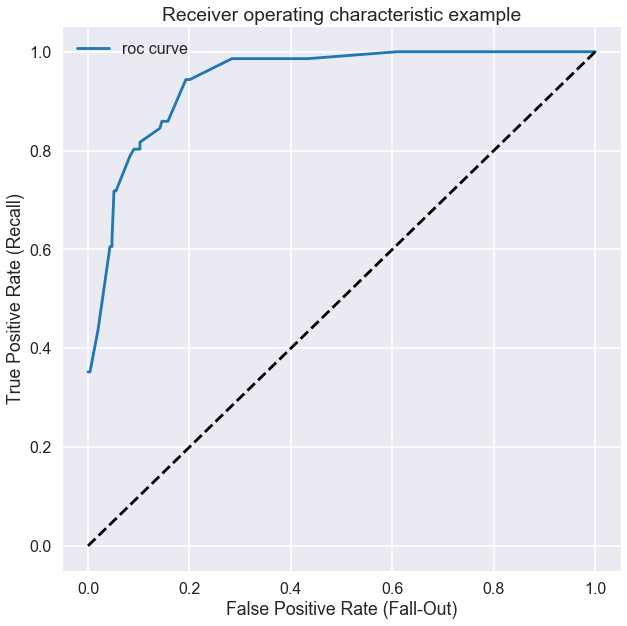

In [811]:
draw_roc()

In [812]:
roc_auc_score(y_test, model6.predict_proba(X_test)[:, 1])

0.9428024841965177

In [814]:
for name, importance in zip(X_train.columns, model6.feature_importances_):
    print(name, importance)

single_count 0.04247842456871905
freq_billboard 0.012809383963746843
freq_genius 0.01912539538240489
freq_theSource 0.08637554626994977
freq_xxl 0.07616128022013935
twitter 0.09760758986133447
instagram 0.08981538136542626
facebook 0.05387008363993926
spotify 0.11731202528554978
soundcloud 0.22110220920442072
youtube 0.05281345373251325
genre_funk 0.0014336153132473103
genre_hiphop 0.016586005179346934
genre_pop 0.057225741709339285
genre_rnb 0.004630676677630325
genre_soul 0.004542487174165016
rating 0.04611070045212747


In [813]:
# RandomUnderSampler

print(confusion_matrix(y_test, model6.predict(X_test)))
print(classification_report(y_test, model6.predict(X_test)))

[[228  26]
 [ 13  58]]
             precision    recall  f1-score   support

          0       0.95      0.90      0.92       254
          1       0.69      0.82      0.75        71

avg / total       0.89      0.88      0.88       325



In [658]:
# CondensedNearestNeighour

print(confusion_matrix(y_test, model6.predict(X_test)))
print(classification_report(y_test, model6.predict(X_test)))

[[220  34]
 [ 14  57]]
             precision    recall  f1-score   support

          0       0.94      0.87      0.90       254
          1       0.63      0.80      0.70        71

avg / total       0.87      0.85      0.86       325



In [683]:
# OneSidedSelection

print(confusion_matrix(y_test, model6.predict(X_test)))
print(classification_report(y_test, model6.predict(X_test)))

[[240  14]
 [ 29  42]]
             precision    recall  f1-score   support

          0       0.89      0.94      0.92       254
          1       0.75      0.59      0.66        71

avg / total       0.86      0.87      0.86       325



In [695]:
# EditedNearestNeighbours

print(confusion_matrix(y_test, model6.predict(X_test)))
print(classification_report(y_test, model6.predict(X_test)))

[[228  26]
 [ 15  56]]
             precision    recall  f1-score   support

          0       0.94      0.90      0.92       254
          1       0.68      0.79      0.73        71

avg / total       0.88      0.87      0.88       325



In [707]:
# NeighbourhoodCleaningRule

print(confusion_matrix(y_test, model6.predict(X_test)))
print(classification_report(y_test, model6.predict(X_test)))

[[222  32]
 [ 14  57]]
             precision    recall  f1-score   support

          0       0.94      0.87      0.91       254
          1       0.64      0.80      0.71        71

avg / total       0.88      0.86      0.86       325



In [719]:
# NearMiss

print(confusion_matrix(y_test, model6.predict(X_test)))
print(classification_report(y_test, model6.predict(X_test)))

[[104 150]
 [  0  71]]
             precision    recall  f1-score   support

          0       1.00      0.41      0.58       254
          1       0.32      1.00      0.49        71

avg / total       0.85      0.54      0.56       325



In [731]:
# NeighbourhoodCleaningRule

print(confusion_matrix(y_test, model6.predict(X_test)))
print(classification_report(y_test, model6.predict(X_test)))

[[230  24]
 [ 13  58]]
             precision    recall  f1-score   support

          0       0.95      0.91      0.93       254
          1       0.71      0.82      0.76        71

avg / total       0.89      0.89      0.89       325



In [743]:
# AllKNN

print(confusion_matrix(y_test, model6.predict(X_test)))
print(classification_report(y_test, model6.predict(X_test)))

[[215  39]
 [  8  63]]
             precision    recall  f1-score   support

          0       0.96      0.85      0.90       254
          1       0.62      0.89      0.73        71

avg / total       0.89      0.86      0.86       325



In [755]:
# InstanceHardnessThreshold

print(confusion_matrix(y_test, model6.predict(X_test)))
print(classification_report(y_test, model6.predict(X_test)))

[[222  32]
 [ 10  61]]
             precision    recall  f1-score   support

          0       0.96      0.87      0.91       254
          1       0.66      0.86      0.74        71

avg / total       0.89      0.87      0.88       325



In [ ]:
scores_dict = {num_trees:[] for num_trees in np.logspace(start=1,stop=3.478,num=20).astype(int)}
oob_err_dict = {num_trees:0 for num_trees in np.logspace(start=1,stop=3.478,num=20).astype(int)}
k = 10
for num_trees in np.logspace(start=1,stop=3.478,num=20).astype(int):
    warnings.filterwarnings("ignore")
    clf = RandomForestClassifier(n_estimators=num_trees, n_jobs=-1, max_depth=10, oob_score=True)
    scores = cross_val_score(clf, X_train, y_train, cv=k, n_jobs=-1)
    model = clf.fit(X_train, y_train)
    preds = model.predict(X_test)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    scores_dict[num_trees].append([scores.mean(), precision, recall, f1])
    temp_oob = 1 - clf.oob_score_
    oob_err_dict[num_trees] = temp_oob

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.semilogx(list(scores_dict.keys()),[elem[0][0] for elem in scores_dict.values()], '-', label='Mean 10-Fold Accuracy')
ax.semilogx(list(scores_dict.keys()),[elem[0][1] for elem in scores_dict.values()], '-', label='Precision')
ax.semilogx(list(scores_dict.keys()),[elem[0][2] for elem in scores_dict.values()], '-', label='Recall')
ax.semilogx(list(scores_dict.keys()),[elem[0][3] for elem in scores_dict.values()], '-', label='F1')
ax.legend()
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Measure')
# ax.set_ylim(0.89,1.)
plt.show()